# Predicting house sale price

In this project, we will use the housing data for the city of Ames, Iowa, US from 2006 to 2010 to predict house sale price. The dataset can be found [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). The description of the data can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999

housing = pd.read_csv('AmesHousing.tsv', delimiter='\t')
housing.shape

(2930, 82)

In [2]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Feature engineering

Handle missing values by removing features and filling in the mode.

In [3]:
nulls = housing.isnull().sum()
nulls.sort_values(ascending=False)

Pool QC            2917
Misc Feature       2824
Alley              2732
Fence              2358
Fireplace Qu       1422
Lot Frontage        490
Garage Qual         159
Garage Yr Blt       159
Garage Cond         159
Garage Finish       159
Garage Type         157
Bsmt Exposure        83
BsmtFin Type 2       81
BsmtFin Type 1       80
Bsmt Cond            80
Bsmt Qual            80
Mas Vnr Type         23
Mas Vnr Area         23
Bsmt Full Bath        2
Bsmt Half Bath        2
Garage Area           1
Garage Cars           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Electrical            1
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
                   ... 
Heating               0
Exter Cond            0
Functional            0
Sale Type             0
Yr Sold               0
Mo Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
3Ssn Porch            0
Enclosed Porch  

In [4]:
# remove columns with missing values of more than 5%
cols_to_remove =  nulls[nulls > len(housing)*0.05].index
print(cols_to_remove)
housing = housing.drop(cols_to_remove, 1)

Index(['Lot Frontage', 'Alley', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')


In [5]:
# verify that columns have been droped
housing.isnull().sum().sort_values(ascending=False)

Bsmt Exposure      83
BsmtFin Type 2     81
Bsmt Qual          80
Bsmt Cond          80
BsmtFin Type 1     80
Mas Vnr Area       23
Mas Vnr Type       23
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Cars         1
BsmtFin SF 1        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
BsmtFin SF 2        1
Garage Area         1
Condition 1         0
Land Slope          0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Exter Cond          0
Lot Shape           0
Land Contour        0
Exter Qual          0
Utilities           0
Lot Config          0
Exterior 2nd        0
                   ..
Year Built          0
SalePrice           0
Sale Condition      0
Heating             0
Sale Type           0
Yr Sold             0
Mo Sold             0
Misc Val            0
Pool Area           0
Screen Porch        0
3Ssn Porch          0
Enclosed Porch      0
Open Porch SF       0
Wood Deck SF        0
Paved Driv

In [6]:
# drop columns with missing values
text_null_counts = housing.select_dtypes(include=['object']).isnull().sum()
text_cols_to_remove = text_null_counts[text_null_counts > 0]
print(text_cols_to_remove)

housing = housing.drop(text_cols_to_remove.index, 1)

Mas Vnr Type      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Electrical         1
dtype: int64


In [7]:
# verify that columns have been droped
text_null_counts = housing.select_dtypes(include=['object']).isnull().sum()
text_null_counts[text_null_counts > 0]

Series([], dtype: int64)

In [8]:
# find nulls for int nad float column types
na_numerical = housing.select_dtypes(include=['int', 'float']).isnull().sum()
print(na_numerical[na_numerical>0])

cols_to_fill = na_numerical[na_numerical>0].index
print(cols_to_fill)

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64
Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
       'Garage Area'],
      dtype='object')


In [9]:
# fill na with mode value
# mode() returns a Series, so iterate each column
for column in cols_to_fill:
    housing[column].fillna(housing[column].mode()[0], inplace=True)

null_counts = housing.isnull().sum().sort_values(ascending=False)
housing.isnull().sum().value_counts()

0    64
dtype: int64

In [10]:
# Year Remod/Add and Year build column does not provide useful information for a linear regression model
housing['Years Before Sale'] = housing['Yr Sold'] - housing['Year Built']
housing['Years Since Remod'] = housing['Yr Sold'] - housing['Year Remod/Add']

# remove rows that does not make sense
print('Before: {}'.format(housing.shape))
housing = housing.drop(housing[housing['Years Before Sale']<0].index)
housing = housing.drop(housing[housing['Years Since Remod']<0].index)

# drop the columns as we have the new more infomative columns
housing = housing.drop(["Year Built", "Year Remod/Add"], 1)

print('After: {}'.format(housing.shape))

Before: (2930, 66)
After: (2927, 64)


In [11]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Years Before Sale,Years Since Remod
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000,50,50
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000,49,49
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000,52,52
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex,Y,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000,42,42
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900,13,12


In [12]:
# drop columns that aren't useful for machine learning
housing = housing.drop(["PID", "Order"], axis=1)

# drop columns with data leakage to prevent overfitting
housing = housing.drop(["Mo Sold", "Yr Sold", "Sale Type", "Sale Condition"], 1)

In [13]:
transform_df = housing.copy()
print(transform_df.shape)

(2927, 58)


# Feature selection

Will produce a correlation map/heatmap to find features that have strong correlation with the target column. Weak ones will be removed. Also removing nominal features with high number of unique values.

In [14]:
# get correlation and filter out those less than 0.4
corr_map = transform_df.select_dtypes(include=['float', 'int']).corr().abs()
saleprice_corr = corr_map['SalePrice'].sort_values()
saleprice_corr[saleprice_corr>0.4]

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

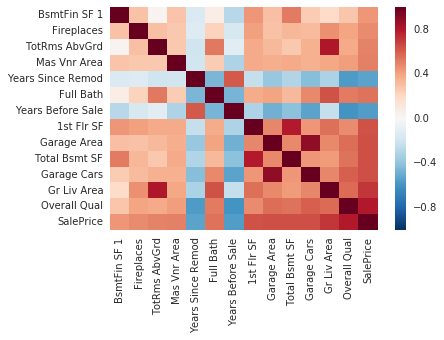

In [15]:
import seaborn as sns
%matplotlib inline

# graphical representation
corrmat = transform_df[saleprice_corr[saleprice_corr>0.4].index].corr()
sns.heatmap(corrmat)

In [16]:
# drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(saleprice_corr[saleprice_corr < 0.4].index, axis=1)

In [17]:
transform_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,6,Typ,1,2.0,482.0,Y,189900,13,12


In [18]:
# list out how many unique values in each nominal feature
nominal_features = ["MS Zoning", "Street", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Foundation", "Heating", "Central Air"]
# nominal_features = transform_df.select_dtypes(include=['object']).columns

# keep track of columns with more than 10 unique values
nominal_features_to_drop = []
for col in nominal_features:
    unique_counts = len(transform_df[col].unique())
    print("{}: \t {}".format(col, unique_counts))
    
    if unique_counts > 10:
        nominal_features_to_drop.append(col)

MS Zoning: 	 7
Street: 	 2
Land Contour: 	 4
Lot Config: 	 5
Neighborhood: 	 28
Condition 1: 	 9
Condition 2: 	 8
Bldg Type: 	 5
House Style: 	 8
Roof Style: 	 6
Roof Matl: 	 8
Exterior 1st: 	 16
Exterior 2nd: 	 17
Foundation: 	 6
Heating: 	 6
Central Air: 	 2


In [19]:
# cut off columns with more than 10 unique values
print("nominal features to drop: {}".format(nominal_features_to_drop))

transform_df = transform_df.drop(nominal_features_to_drop, 1)

nominal features to drop: ['Neighborhood', 'Exterior 1st', 'Exterior 2nd']


In [20]:
# convert the remaining nominal features to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')

In [21]:
# populate dummies data and concat to columns
dummy_data = pd.get_dummies(transform_df.select_dtypes(include=['category']))
transform_df = pd.concat([transform_df, dummy_data], 1)
transform_df = transform_df.drop(text_cols,axis=1)

In [22]:
# the numbers of columns have exploded
transform_df.shape

(2927, 130)

# Train and test 

Finally it is time to use linear regression and K-Folds cross-validator to train and test to predict the house price.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def train_and_test(df, k=5):  
    split_index = round(len(df)*0.5)
    train = df.iloc[:split_index]
    test = df.iloc[split_index:]
    
    target = 'SalePrice'
    features_df = df.select_dtypes(include=['integer', 'float'])
    features = features_df.columns.drop(target)    
    
    lr = LinearRegression()
    kf = KFold(n_splits=k, shuffle=True)
    
    rmse_values = []
    for train_index, test_index, in kf.split(df):
        train = df.iloc[train_index]
        test = df.iloc[test_index]
        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        rmse_values.append(rmse)
    print(rmse_values)
    avg_rmse = np.mean(rmse_values)
    return avg_rmse
    
    return rmse
    
train_and_test(transform_df)  

[25767.04749908405, 26108.152346991686, 27292.86126229938, 25782.87918302871, 39160.346768340874]


28822.25741194894

In [24]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
filtered_df = df[["Gr Liv Area", "SalePrice"]]
train_and_test(filtered_df)  

[59460.86629581742, 56379.87379226474, 50449.28654135994, 60392.8139386033, 55914.45908535818]


56519.459930680714

# Conclusion

The final model missed the house sale price by about 29k in root mean square error compared to 56k the model with no intelligent feature engineering/selecting.